CREDIT CARD FRAUD DETECTION USING SCIKIT-LEARN AND SNAP ML

In this project, we will consolidate the machine learning (Ml) modeling skills by using two popular classification models to recognize fraudulent credit card transactions: Decision Tree and Support Vector Machine. The dataset includes information about transactions made by credit cards in September 2013 by European cardholders

Table of Contents

1) Import Libraries
2) Dataset Analysis
3) Dataset Preprocessing
4) Dataset Train/Test Split
5) Build a Decision Tree Classifier model with Scikit-Learn
6) Build a Decision Tree Classifier model with Snap ML
7) Evaluate the Scikit-Learn and Snap ML Decision Tree Classifiers
8) Build a Support Vector Machine model with Scikit-Learn
9) Build a Support Vector Machine model with Snap Ml
10) Evaluate the Scikit-Learn and Snap ML Support Vector Machine Models

First, let's download the dataset

In [2]:
%pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od

dataset_url = "https://www.kaggle.com/mlg-ulb/creditcardfraud"
data_dir = '/Users/nalini/'
od.download(dataset_url, data_dir = data_dir)

Skipping, found downloaded files in "/Users/nalini/creditcardfraud" (use force=True to force download)


1)  IMPORT LIBRARY

In [4]:
%pip install --upgrade pip
%pip install snapml
%pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement snapml (from versions: none)
ERROR: No matching distribution found for snapml
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

DATASET ANALYSIS

In [11]:
# READ THE INPUT DATA
raw_data = pd.read_csv('creditcardfraud/creditcard.csv')
print('There are', len(raw_data),'observation in the data set')
print('There are', len(raw_data.columns), 'variables in the data set')
#
raw_data.head()

There are 284807 observation in the data set
There are 31 variables in the data set


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In practice, financial institution may have larger dataset, so we will inflate the dataset to 10

In [13]:
n_replicas = 10
#inflate the original dataset

big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis = 0), columns = raw_data.columns)

print('There are', len(big_raw_data), 'observations in the data set')
print('There are', len(big_raw_data.columns), 'variables in the data set')



There are 2848070 observations in the data set
There are 31 variables in the data set


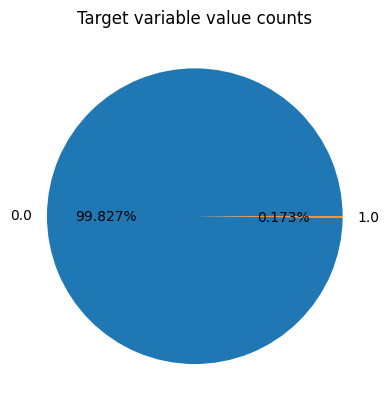

In [20]:
#get the set of distinct class
labels = big_raw_data.Class.unique()

#get the count of each class
sizes = big_raw_data.Class.value_counts().values

#plot the class value counts
fig,ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct= '%1.3f%%')
ax.set_title('Target variable value counts')
plt.show()

The minimum value is: 0.0
The maximum value is: 25691.16
90% of the transactions have the amount less than or equal to 203.0


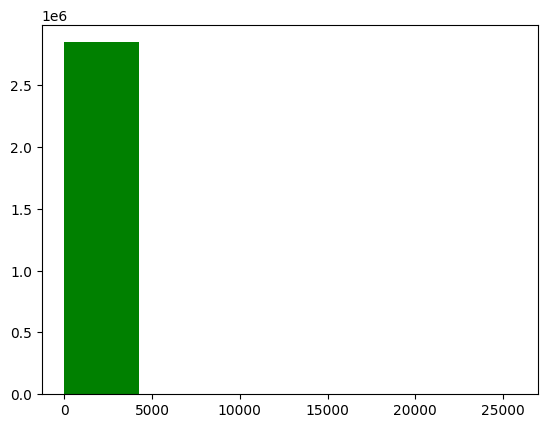

In [22]:
plt.hist(big_raw_data.Amount.values, 6, histtype = 'bar', facecolor = 'g')
print('The minimum value is:', np.min(big_raw_data.Amount.values))
print('The maximum value is:', np.max(big_raw_data.Amount.values))
print('90% of the transactions have the amount less than or equal to', np.percentile(big_raw_data.Amount.values, 90))

#DATA PROCESSING